# Calculating topographic factors from vtm

Define S1 probes

In [1]:
from cfdmod.use_cases.s1.probe import S1Probe
import pathlib

field_data_path = pathlib.Path("./fixtures/tests/s1/vtm/00050000_.vtm") 

pitot_probe = S1Probe(p1=[10,10,0], p2=[10,10,50], numPoints=100)
example_probe = S1Probe(p1=[100,10,0], p2=[100,10,50], numPoints=100)

pitot_probe, example_probe

(S1Probe(p1=[10.0, 10.0, 0.0], p2=[10.0, 10.0, 50.0], numPoints=100),
 S1Probe(p1=[100.0, 10.0, 0.0], p2=[100.0, 10.0, 50.0], numPoints=100))

Extract data from multiblock dataset

In [2]:
from cfdmod.api.vtk.probe_vtm import read_vtm, create_line, probe_over_line, get_array_from_filter

reader = read_vtm(field_data_path)

pitot_line = create_line(pitot_probe.p1, pitot_probe.p2, pitot_probe.numPoints - 1)
probe_line = create_line(example_probe.p1, example_probe.p2, example_probe.numPoints - 1)

pitot_filter = probe_over_line(pitot_line, reader)
probe_filter = probe_over_line(probe_line, reader)

pitot_data = get_array_from_filter(pitot_filter, array_lbl="ux")
probe_data = get_array_from_filter(probe_filter, array_lbl="ux")

pitot_data[:10], probe_data[:10]

(array([0.        , 0.        , 0.02068254, 0.02068254, 0.03970807,
        0.03970807, 0.05423942, 0.05423942, 0.06089158, 0.06089158],
       dtype=float32),
 array([3.7299221e-09, 3.7299221e-09, 1.4394111e-02, 1.4394111e-02,
        2.8799690e-02, 2.8799690e-02, 4.4140887e-02, 4.4140887e-02,
        5.6612194e-02, 5.6612194e-02], dtype=float32))

Create profiles from extracted data

In [3]:
from cfdmod.use_cases.s1.profile import Profile
import numpy as np

pitot_pos = np.linspace(pitot_probe.p1[2], pitot_probe.p2[2], pitot_probe.numPoints)
probe_pos = np.linspace(example_probe.p1[2], example_probe.p2[2], example_probe.numPoints)

pitot_profile = Profile(pos=pitot_pos, values=pitot_data, label="Pitot")
probe_profile = Profile(pos=probe_pos, values=probe_data, label="Example probe")

s1_profile = probe_profile / pitot_profile

s1_profile

a:\Aerosim\Repositories\cfdmod\cfdmod\use_cases\s1\profile.py:34: RuntimeWarning: divide by zero encountered in divide
  s1_values = self.values[1:] / rhs.values[1:]  # Ignore wall values (u=0)


pos: [ 0.50505051  1.01010101  1.51515152  2.02020202  2.52525253  3.03030303
  3.53535354  4.04040404  4.54545455  5.05050505  5.55555556  6.06060606
  6.56565657  7.07070707  7.57575758  8.08080808  8.58585859  9.09090909
  9.5959596  10.1010101  10.60606061 11.11111111 11.61616162 12.12121212
 12.62626263 13.13131313 13.63636364 14.14141414 14.64646465 15.15151515
 15.65656566 16.16161616 16.66666667 17.17171717 17.67676768 18.18181818
 18.68686869 19.19191919 19.6969697  20.2020202  20.70707071 21.21212121
 21.71717172 22.22222222 22.72727273 23.23232323 23.73737374 24.24242424
 24.74747475 25.25252525 25.75757576 26.26262626 26.76767677 27.27272727
 27.77777778 28.28282828 28.78787879 29.29292929 29.7979798  30.3030303
 30.80808081 31.31313131 31.81818182 32.32323232 32.82828283 33.33333333
 33.83838384 34.34343434 34.84848485 35.35353535 35.85858586 36.36363636
 36.86868687 37.37373737 37.87878788 38.38383838 38.88888889 39.39393939
 39.8989899  40.4040404  40.90909091 41.4141414

Plotting Velocity Profiles extracted

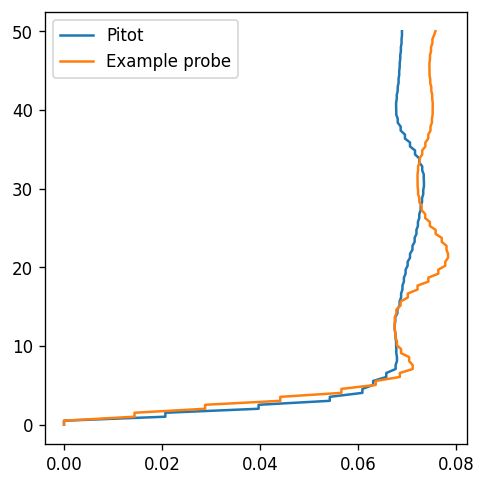

In [4]:
import matplotlib.pyplot as plt
from cfdmod.use_cases.s1.plotting import set_style_tech

fig, ax = plt.subplots(figsize=(10 / 2.54, 10 / 2.54), constrained_layout=True, dpi=120)

ax.plot(pitot_profile.values, pitot_profile.pos, label=pitot_profile.label)
ax.plot(probe_profile.values, probe_profile.pos, label=probe_profile.label)
# set_style_tech()
ax.legend()
plt.show(fig)
plt.close(fig)

Plotting S1

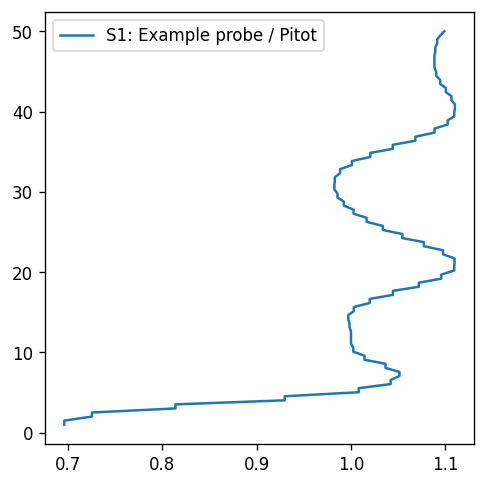

In [5]:
import matplotlib.pyplot as plt
from cfdmod.use_cases.s1.plotting import set_style_tech

fig, ax = plt.subplots(figsize=(10 / 2.54, 10 / 2.54), constrained_layout=True, dpi=120)

ax.plot(s1_profile.values, s1_profile.pos, label=s1_profile.label)

# set_style_tech()
ax.legend()
plt.show(fig)
# plt.close(fig)